### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




# Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Dataset

In [2]:
data_svm=pd.read_csv('SVM.csv')
data_svm.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [3]:
data_svm.shape

(17898, 9)

cheking the missing values in the dataset

In [4]:
data_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
data_svm.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

by inspecting this dataset we have found that there are three independent columns in which null values present i.e excess kurtosis of the intergrated profile has 2502 null values.
In standard deviation of the dm-snr curve there are 1702 missing values,similarly in skewness of the DM-SNR curve has 
869 null values.

but in target class there also null values i.e 5370 exactly.

<Axes: xlabel='target_class', ylabel='count'>

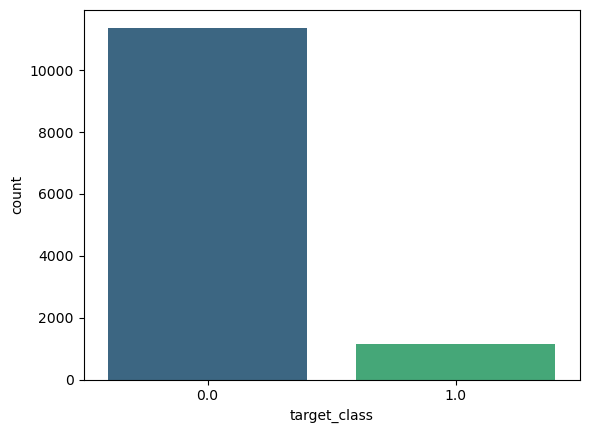

In [6]:
sns.countplot(data=data_svm,x='target_class',palette='viridis')

In [7]:
data_svm.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


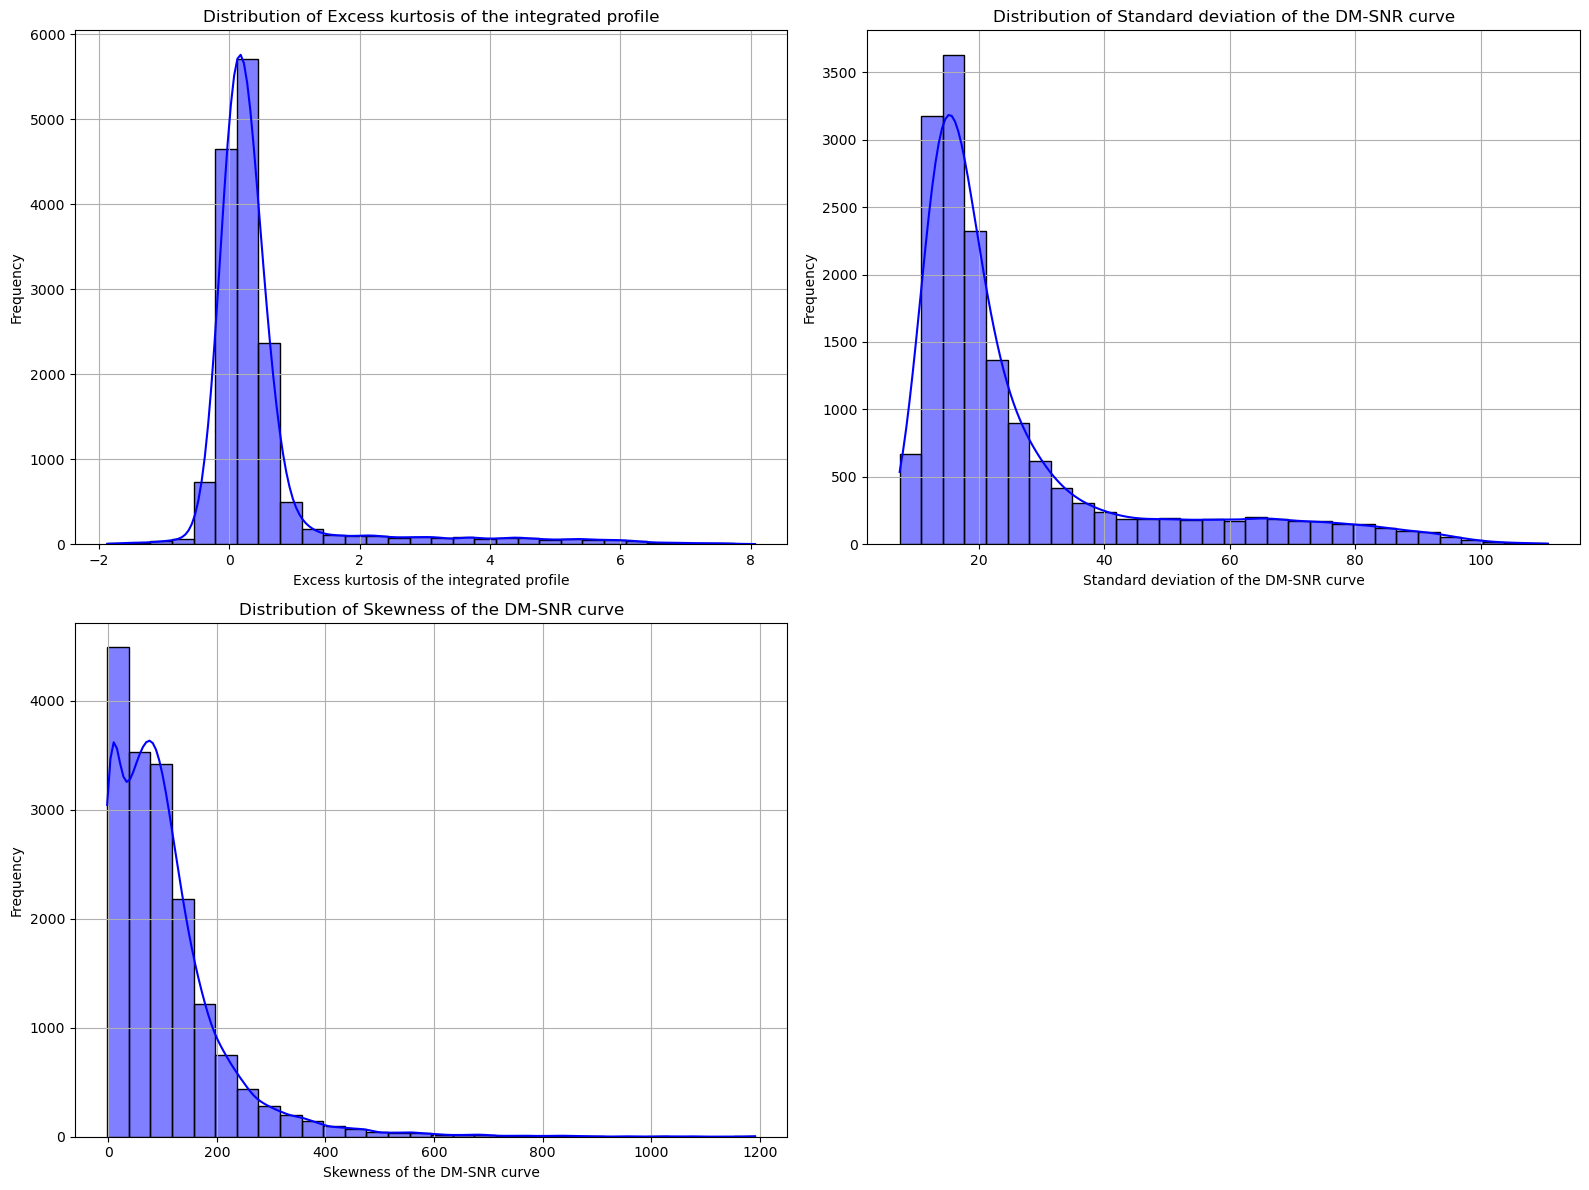

In [8]:
data_svm.columns=data_svm.columns.str.strip()
# columns with missing values
columns_with_missing = [
    'Excess kurtosis of the integrated profile',
    'Standard deviation of the DM-SNR curve',
    'Skewness of the DM-SNR curve'
    
]

# Plot histograms for columns with missing values
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_with_missing, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_svm[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()



here the input features are skewed so we should follow the median imputing strategy 

In [9]:
features = data_svm.iloc[:, :-1]
target = data_svm.iloc[:,-1]


In [10]:
from sklearn.impute import SimpleImputer
# Impute missing values in features with the median
imputer = SimpleImputer(strategy='median')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


In [11]:
# Remove rows with missing target values so
cleaned_data = features_imputed[target.notnull()]
cleaned_target = target.dropna().reset_index(drop=True)

In [12]:
#checking the null values again
features_imputed.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
dtype: int64

In [13]:
features_imputed.isnull().any()

Mean of the integrated profile                  False
Standard deviation of the integrated profile    False
Excess kurtosis of the integrated profile       False
Skewness of the integrated profile              False
Mean of the DM-SNR curve                        False
Standard deviation of the DM-SNR curve          False
Excess kurtosis of the DM-SNR curve             False
Skewness of the DM-SNR curve                    False
dtype: bool

# now there are no missing values in this dataset

Now let see some visualizations of this dataset

d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\L

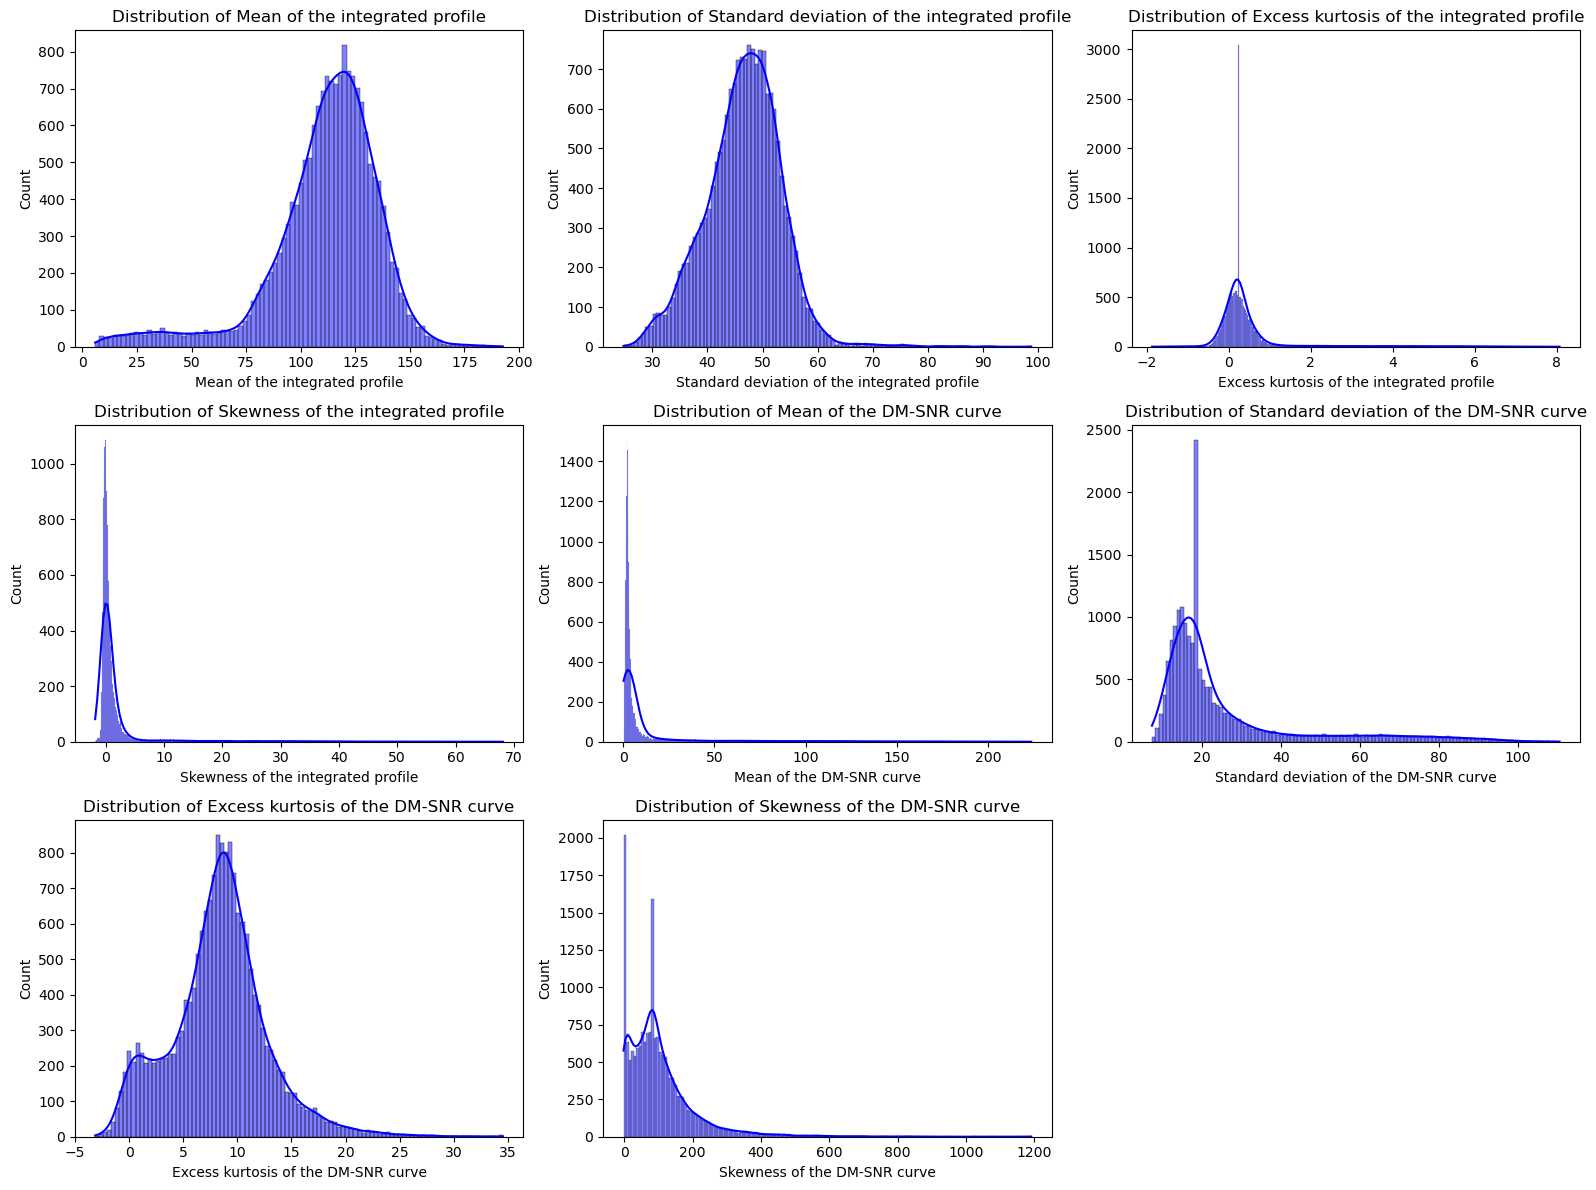

In [14]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(features_imputed.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(features_imputed[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.tight_layout()

In [15]:
# check the correlation of this dataset 
plt.figure(figsize=(10, 8))
correlation_matrix = data_svm.corr()
correlation_matrix

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873790,-0.738775,-0.298841,-0.308526,0.234331,0.143457,-0.676129
Standard deviation of the integrated profile,0.547137,1.000000,-0.525935,-0.539793,0.006869,-0.048837,0.029429,0.027911,-0.365757
Excess kurtosis of the integrated profile,-0.873790,-0.525935,1.000000,0.945342,0.410413,0.430355,-0.339824,-0.213462,0.791661
Skewness of the integrated profile,-0.738775,-0.539793,0.945342,1.000000,0.412056,0.413198,-0.328843,-0.204289,0.707086
Mean of the DM-SNR curve,-0.298841,0.006869,0.410413,0.412056,1.000000,0.798138,-0.615971,-0.353373,0.400375
Standard deviation of the DM-SNR curve,-0.308526,-0.048837,0.430355,0.413198,0.798138,1.000000,-0.809986,-0.575115,0.497210
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.339824,-0.328843,-0.615971,-0.809986,1.000000,0.923726,-0.389788
Skewness of the DM-SNR curve,0.143457,0.027911,-0.213462,-0.204289,-0.353373,-0.575115,0.923726,1.000000,-0.259065
target_class,-0.676129,-0.365757,0.791661,0.707086,0.400375,0.497210,-0.389788,-0.259065,1.000000


<Figure size 1000x800 with 0 Axes>

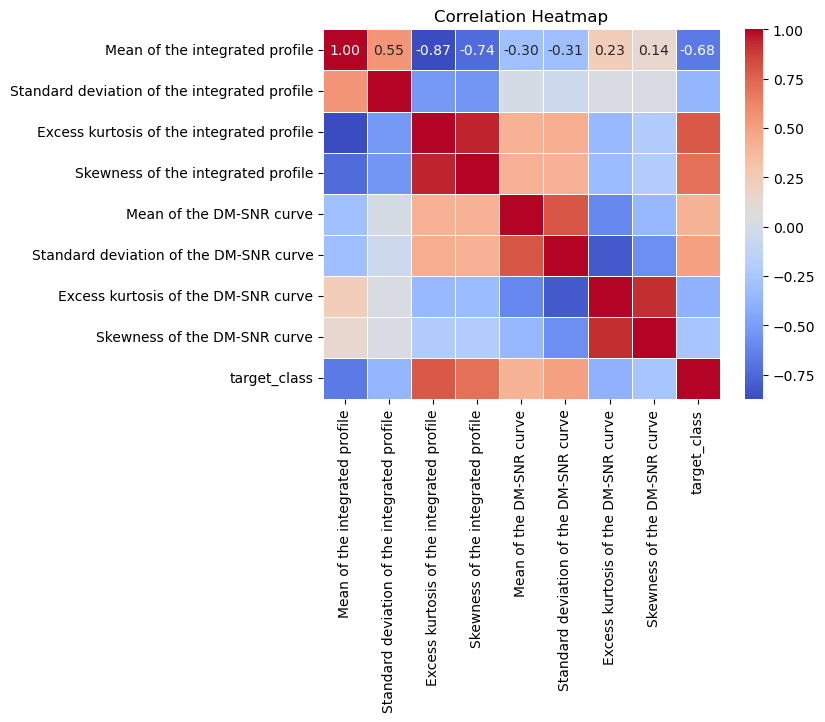

In [16]:
# give it the heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(cleaned_data), columns=cleaned_data.columns)


In [18]:
# Confirm the cleanup and scaled data
features_scaled.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04
mean,1.795073e-16,-9.609172e-16,1.134327e-18,1.928357e-17,6.891039e-17,1.911342e-16,-3.924773e-16,-1.230745e-16
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-4.099024e+00,-3.198061e+00,-2.198785e+00,-5.750967e-01,-4.208269e-01,-9.697798e-01,-2.529489e+00,-1.014965e+00
25%,-3.961836e-01,-6.115768e-01,-3.886103e-01,-3.167701e-01,-3.635082e-01,-5.768019e-01,-5.579029e-01,-6.322765e-01
50%,1.613347e-01,6.022593e-02,-2.206866e-01,-2.537150e-01,-3.337194e-01,-3.802850e-01,2.592993e-02,-2.063214e-01
75%,6.258826e-01,6.554613e-01,-2.229057e-02,-1.362806e-01,-2.452213e-01,4.594684e-02,5.279206e-01,2.994733e-01
max,3.065329e+00,6.659092e+00,7.687040e+00,1.068315e+01,7.083152e+00,4.521373e+00,5.777922e+00,1.036851e+01


In [19]:
# target column
cleaned_target.value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

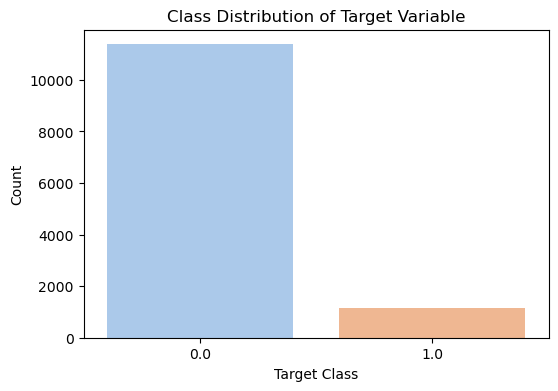

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x=cleaned_target, palette='pastel')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


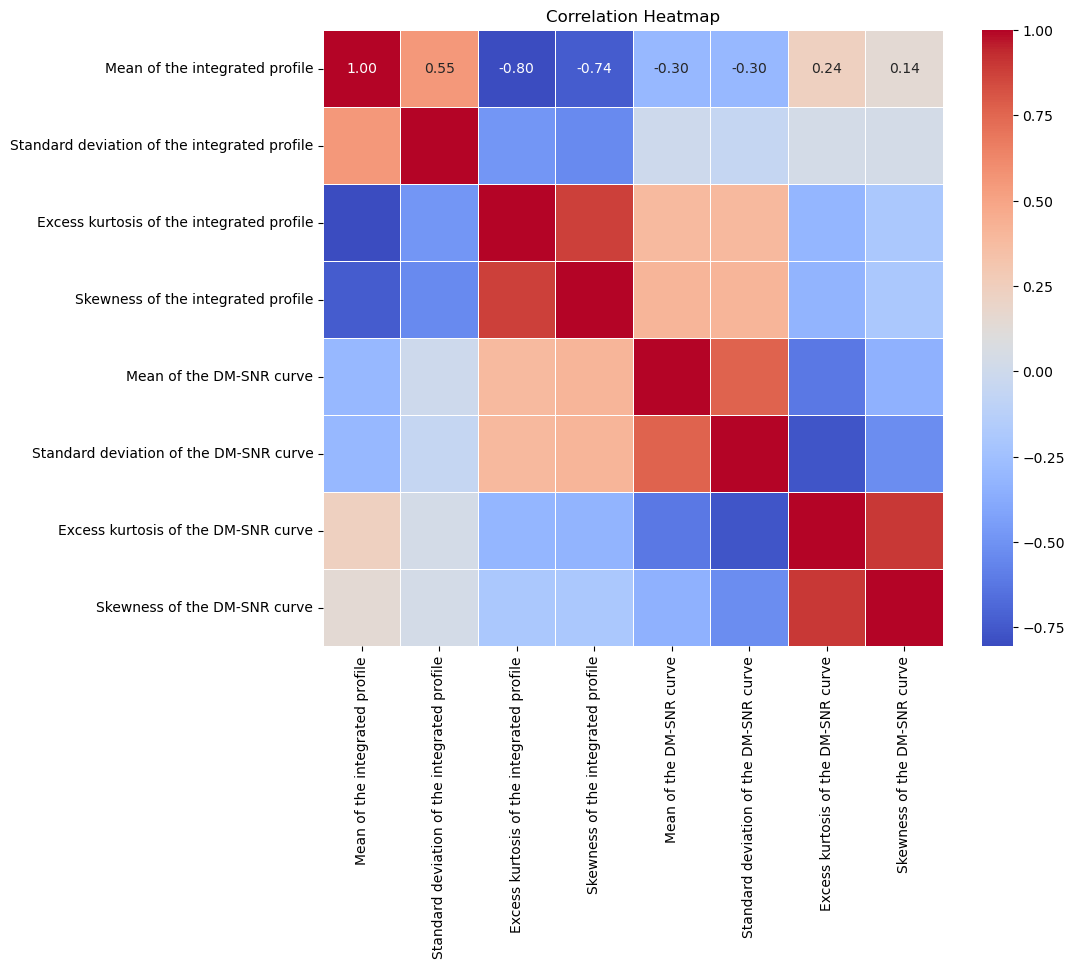

In [21]:
#correlation matrix of standardise data
plt.figure(figsize=(10, 8))
correlation_matrix = features_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


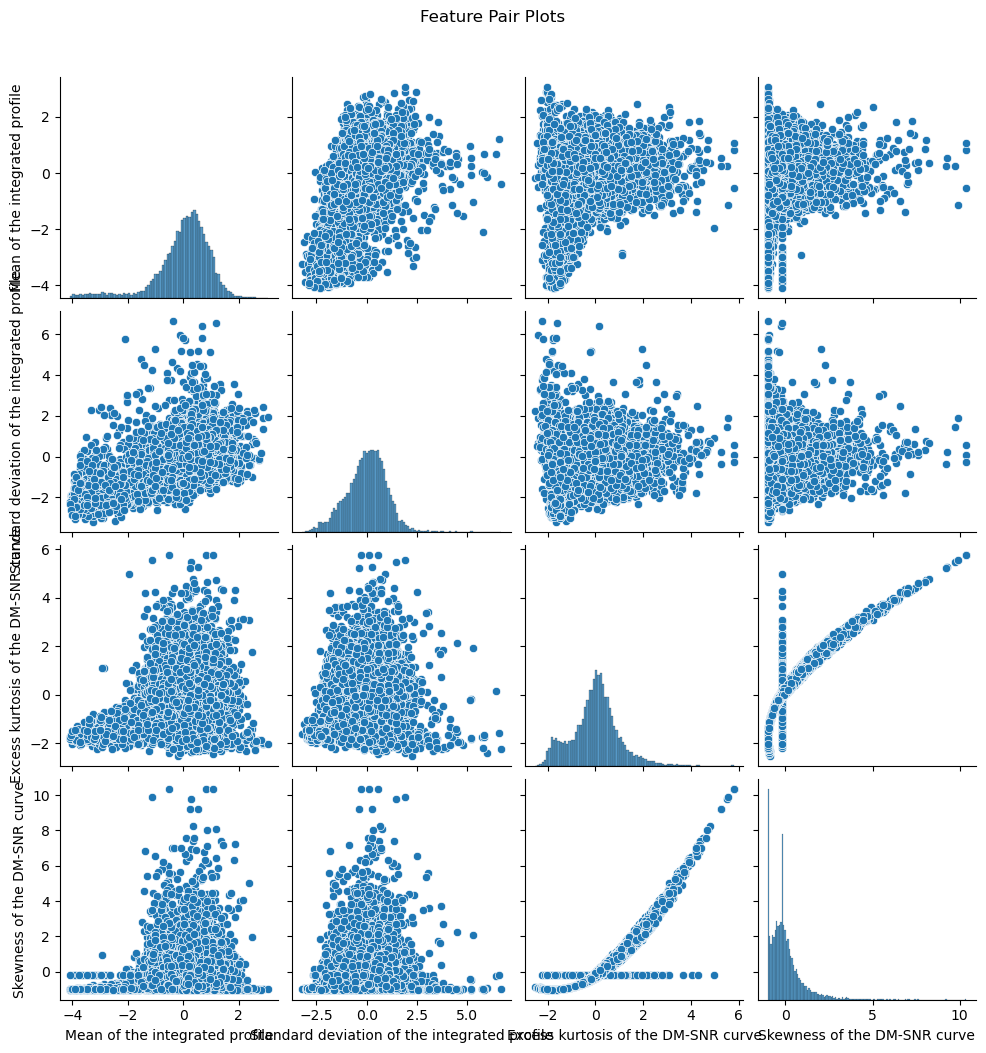

In [22]:
#let see some pairplots to know about futher relations
selected_features = correlation_matrix.nlargest(4, 'Mean of the integrated profile').index
sns.pairplot(features_scaled[selected_features])
plt.suptitle("Feature Pair Plots", y=1.05)
plt.show()

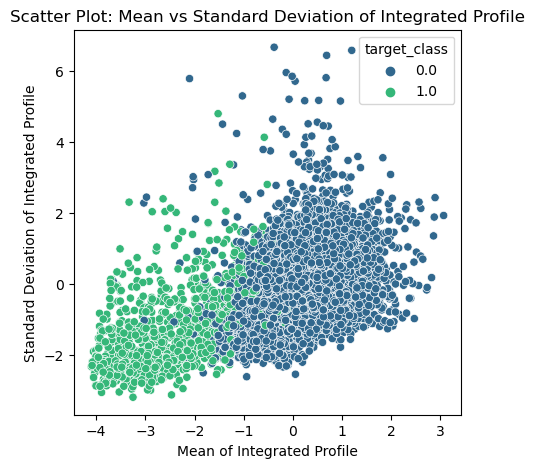

In [23]:
# now see the relationship between specific features
# in this case we aregoing to see between mean of the integrated profile and standard deviation of the integrated profile
plt.figure(figsize=(5,5 ))
sns.scatterplot(x=features_scaled['Mean of the integrated profile'], 
                y=features_scaled['Standard deviation of the integrated profile'], 
                hue=cleaned_target, palette='viridis')
plt.title('Scatter Plot: Mean vs Standard Deviation of Integrated Profile')
plt.xlabel('Mean of Integrated Profile')
plt.ylabel('Standard Deviation of Integrated Profile')
plt.show()


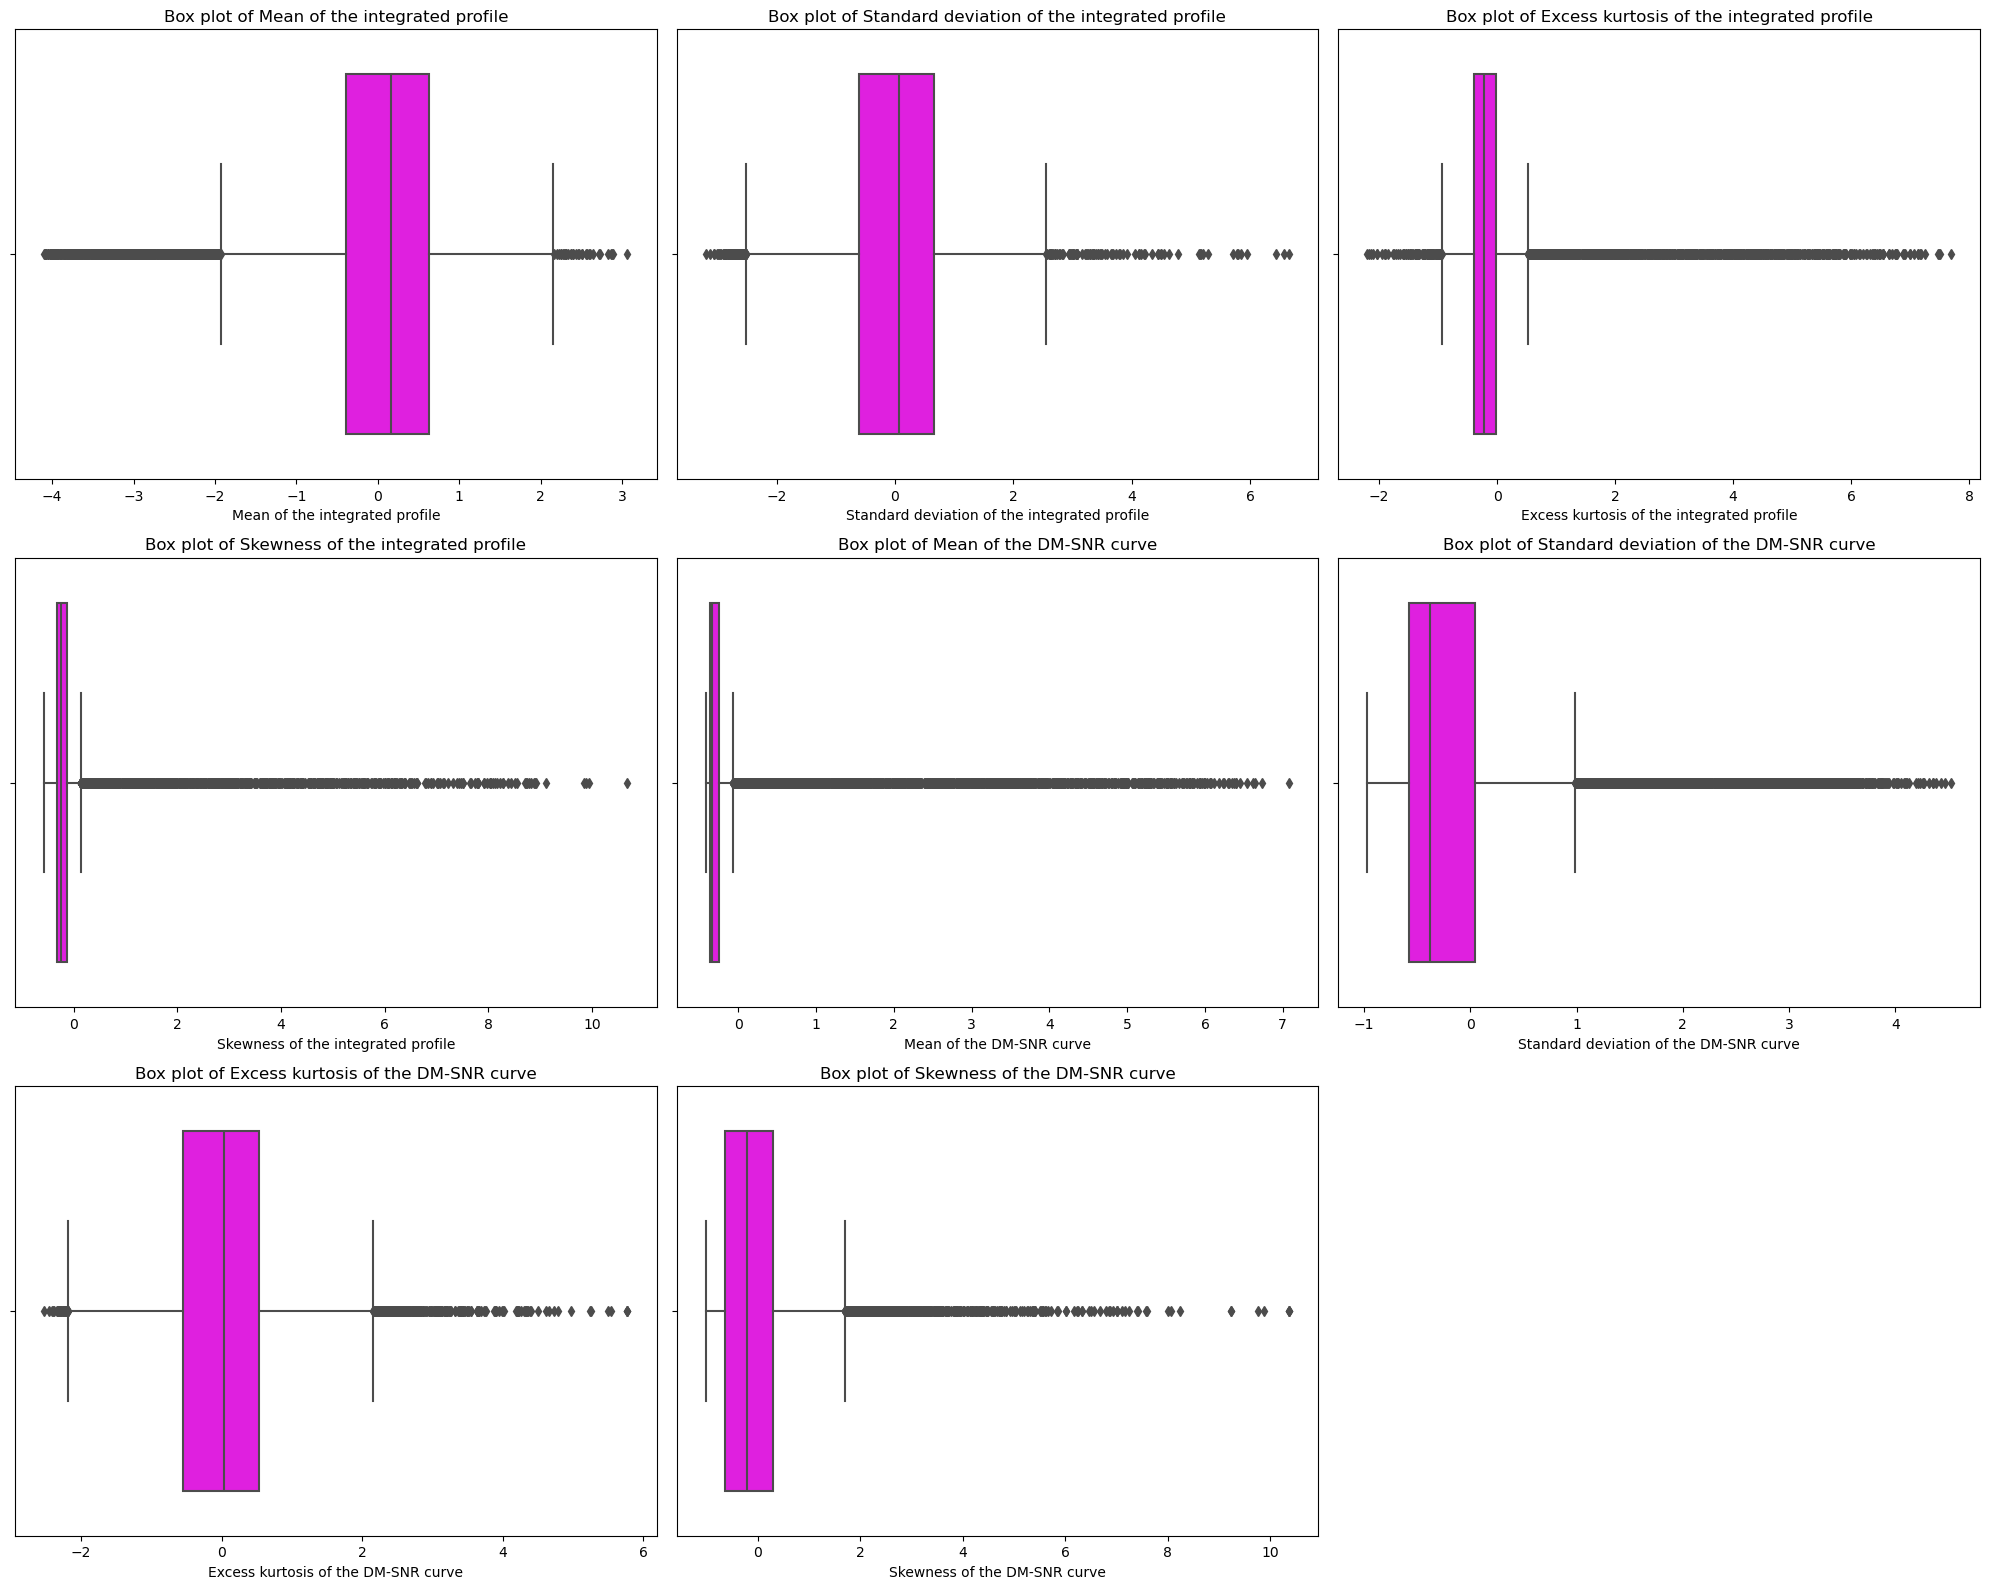

In [24]:
# now see check for outliers in our data through the help of boxplot
plt.figure(figsize=(20,16))
for i,column in enumerate(features_scaled.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=features_scaled[column],color='magenta')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
plt.show()

Now we can see in each feature there are lot of outliers 

In [25]:
# we handle outlier with help of Z-Score method
from scipy.stats import zscore

# Calculate Z-scores for all features
z_scores = features_scaled.apply(zscore)

# threshold for outlier detection
threshold = 3

# Identify rows which are within the threshold
outlier_mask = (z_scores.abs() < threshold).all(axis=1)

# Filter the dataset to remove outliers
features_no_outliers = features_scaled[outlier_mask]
cleaned_target_no_outliers = cleaned_target[outlier_mask]

# Verify the shape of the dataset after handling outliers
print("Dataset shape before removing outliers:", features_scaled.shape)
print("Dataset shape after removing outliers:", features_no_outliers.shape)


Dataset shape before removing outliers: (12528, 8)
Dataset shape after removing outliers: (11263, 8)


In [26]:
features_no_outliers

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.393989,0.272252,-0.068410,-0.288585,-0.321013,-0.383351,-0.194818,-0.374346
1,-1.327257,-1.521273,0.271697,0.259381,-0.346990,-0.427397,0.238373,-0.015911
2,0.761306,0.986368,-0.312418,-0.334344,-0.335385,-0.172621,0.038556,-0.289689
3,1.766787,0.344739,-0.664604,-0.314056,0.161989,-0.380285,-1.185162,-0.927418
4,-1.022022,-1.529786,0.384706,0.240922,-0.333804,-0.265382,0.015768,-0.268125
...,...,...,...,...,...,...,...,...
12523,0.516935,0.978945,-0.459408,-0.376027,-0.185340,0.196696,-0.838280,-0.788798
12524,0.178225,0.038696,-0.226973,-0.249939,-0.220663,-0.380285,-0.573526,-0.668261
12525,0.194354,-0.486353,0.221860,-0.216704,-0.401514,-0.743389,1.922948,1.982974
12526,0.959115,0.501751,-0.537550,-0.322985,-0.297691,-0.218404,-0.206168,-0.401305


In [27]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
features_no_outliers, cleaned_target_no_outliers, test_size=0.3, random_state=42, stratify=cleaned_target_no_outliers)

In [28]:
#create an svm model and train it
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf',C=1,gamma='scale',random_state=42)
svm_model.fit(X_train,y_train)

SVC(C=1, random_state=42)

In [29]:
# make the predictions
y_pred=svm_model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
# evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,recall_score,r2_score

In [31]:
# print confusion matrix
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred))

Confusion matrix: 
 [[3191   11]
 [  49  128]]


In [32]:
# check the report
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3202
         1.0       0.92      0.72      0.81       177

    accuracy                           0.98      3379
   macro avg       0.95      0.86      0.90      3379
weighted avg       0.98      0.98      0.98      3379



In [33]:
# accuracy_score
print('Accuracy Score: \n',accuracy_score(y_test,y_pred))

Accuracy Score: 
 0.982243267238828


In [34]:
# r2_score
print('R2 score: \n ',r2_score(y_test,y_pred))

R2 score: 
  0.6422786605828983


In [42]:
# Hyperparameter 
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf','ploy','sigmoid'],
 'gamma': [1,0.1,0.01,0.001],'degree':[2,3,4]}] 



In [43]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=parameters,  
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

In [44]:
# Fit the model to training data
grid_search.fit(X_train, y_train)

d:\ana\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ana\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ana\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "d:\ana\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "d:\ana\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise In

GridSearchCV(cv=5, estimator=SVC(C=1, random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['linear', 'rbf', 'ploy', 'sigmoid']}],
             scoring='accuracy')

In [46]:
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [47]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(best_model)

SVC(C=10, degree=2, gamma=0.1, random_state=42)


In [48]:
# Evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[3193    9]
 [  50  127]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3202
         1.0       0.93      0.72      0.81       177

    accuracy                           0.98      3379
   macro avg       0.96      0.86      0.90      3379
weighted avg       0.98      0.98      0.98      3379



In [49]:
# now we evaluate on r2 score
r2s=r2_score(y_test,y_pred)
r2s

0.6482406829065166

# now we can see there is a slight increase of r2_score which means model is tuned more.

Now we try to make a prediction on raw data 

In [ ]:
new_data=np.array([[140.5625, 55.683, 30.4006, 56.469, 3.4793, 0.5083, -0.4999, 0.8724]])

In [51]:
# we scaled the new data
scaled_n_data=scaler.transform(new_data)

d:\ana\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
# now we predict using tuned model
prediction=best_model.predict(scaled_n_data)

d:\ana\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [53]:
#Display the prediction
if prediction[0]==1:
    print("The star is predicted as a pulsar")
else:
    print("The star is not predicted as a pulsar")

The star is not predicted as a pulsar


# for raw data the prediction
The star is not predicted as a pulsar

In [55]:
# let try on another data
another_data=np.array([[121.156250,48.372971,0.375485,0.013165,3.168896,18.399367,7.449874,65.159298]])

In [56]:
scaled_another_data=scaler.transform(another_data)

d:\ana\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
predict=best_model.predict(scaled_another_data)

d:\ana\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [59]:
if predict[0]==1:
    print("The star is predicted as a pulsar")
else:
    print("The star is not predicted as a pulsar")


The star is not predicted as a pulsar


For this one again we got a prediction that: 
The star is not predicted as a pulsar